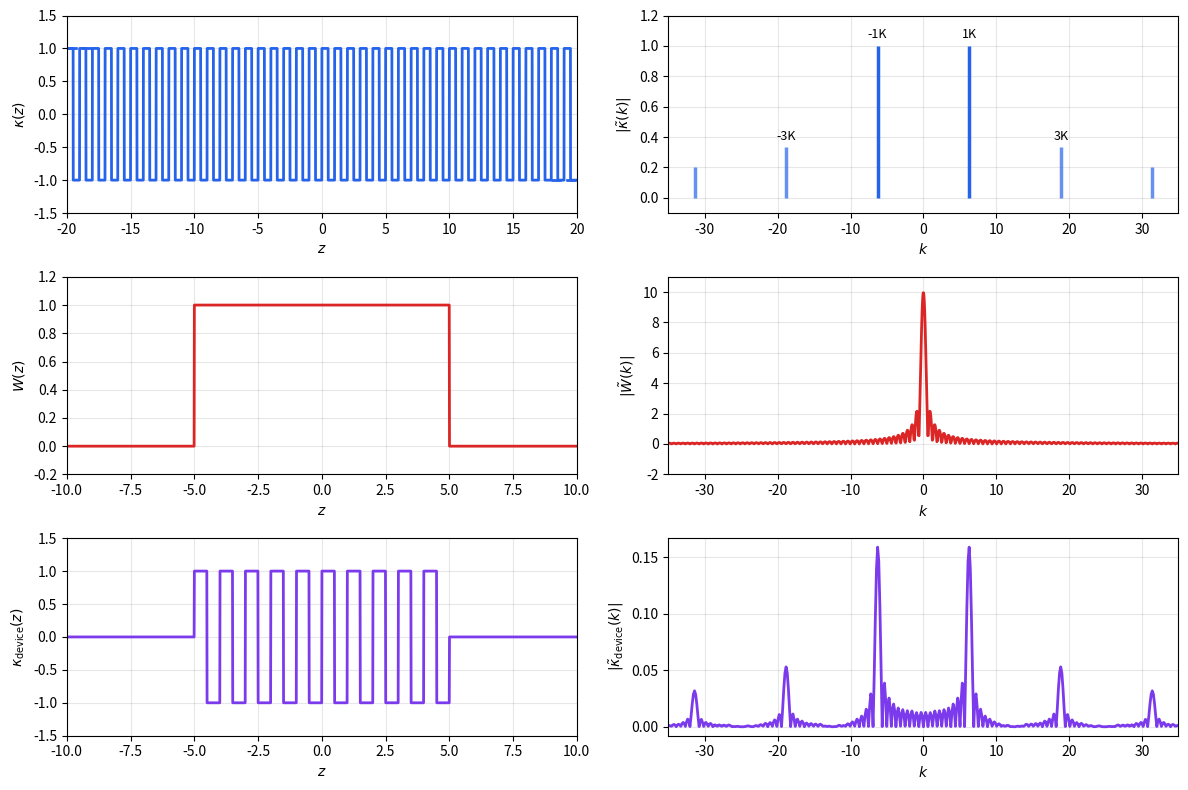

検出されたピークのk値:
[-6.28  6.28]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

# パラメータ設定
L = 10.0  # デバイス長
Lambda = 1.0  # 分極反転周期
n_points = 2048  # サンプリング点数

# より広い範囲で計算（無限構造を近似）
z_extended = np.linspace(-20*L, 20*L, n_points*40)
z = np.linspace(-L, L, n_points)

# 図の作成
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# カラー設定
color_A = '#2563eb'  # 青
color_B = '#dc2626'  # 赤
color_C = '#7c3aed'  # 紫

# 1段目: 無限周期構造
# 左パネル: 実空間
ax1 = axes[0, 0]
kappa_infinite = np.sign(np.sin(2 * np.pi * z_extended / Lambda))
display_range = 2*L
mask = np.abs(z_extended) < display_range
ax1.plot(z_extended[mask], kappa_infinite[mask], color=color_A, linewidth=2)
ax1.plot([-display_range, -display_range*0.9], [kappa_infinite[mask][0], kappa_infinite[mask][0]],
         '--', color=color_A, linewidth=2)
ax1.plot([display_range*0.9, display_range], [kappa_infinite[mask][-1], kappa_infinite[mask][-1]],
         '--', color=color_A, linewidth=2)
ax1.set_xlim(-display_range, display_range)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$\kappa(z)$')
ax1.grid(True, alpha=0.3)

# 右パネル: 周波数空間
ax2 = axes[0, 1]
K = 2 * np.pi / Lambda

# 表示範囲を調整してより多くのδ関数を表示
k_max = 35
ax2.set_xlim(-k_max, k_max)

# より多くのδ関数を表示
for n in range(-5, 6):
    if n == 0:  # 偶数次は0
        continue
    if n % 2 == 0:  # 偶数はスキップ
        continue
    if abs(n) == 1:
        height = 1.0
        alpha = 1.0
    else:
        height = 1.0 / abs(n)
        alpha = 0.7
    ax2.vlines(n*K, 0, height, colors=color_A, linewidth=2.5, alpha=alpha)
    # 主要な成分にラベル
    if abs(n) <= 3:
        ax2.text(n*K, height + 0.05, f'{n}K', ha='center', fontsize=9)

ax2.set_ylim(-0.1, 1.2)
ax2.set_xlabel(r'$k$')
ax2.set_ylabel(r'$|\tilde{\kappa}(k)|$')
ax2.grid(True, alpha=0.3)

# 2段目: 矩形窓関数
# 左パネル: 実空間
ax2 = axes[1, 0]
window = np.zeros_like(z)
window[np.abs(z) <= L/2] = 1.0
ax2.plot(z, window, color=color_B, linewidth=2)
ax2.set_xlim(-L, L)
ax2.set_ylim(-0.2, 1.2)
ax2.set_xlabel(r'$z$')
ax2.set_ylabel(r'$W(z)$')
ax2.grid(True, alpha=0.3)

# 右パネル: 周波数空間
ax4 = axes[1, 1]
k_sinc = np.linspace(-k_max, k_max, 1000)
sinc_function = L * np.sinc(k_sinc * L / (2 * np.pi))
ax4.plot(k_sinc, np.abs(sinc_function), color=color_B, linewidth=2)
ax4.set_xlim(-k_max, k_max)
ax4.set_ylim(-2, L+1)
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$|\tilde{W}(k)|$')
ax4.grid(True, alpha=0.3)

# 3段目: 有限長デバイス構造
# 左パネル: 実空間
ax5 = axes[2, 0]
kappa_device = np.sign(np.sin(2 * np.pi * z / Lambda))
kappa_device[np.abs(z) > L/2] = 0
ax5.plot(z, kappa_device, color=color_C, linewidth=2)
ax5.set_xlim(-L, L)
ax5.set_ylim(-1.5, 1.5)
ax5.set_xlabel(r'$z$')
ax5.set_ylabel(r'$\kappa_{\mathrm{device}}(z)$')
ax5.grid(True, alpha=0.3)

# 右パネル: 周波数空間（畳み込み結果）
ax6 = axes[2, 1]
z_fft = np.linspace(-2*L, 2*L, 4*n_points)
kappa_fft = np.sign(np.sin(2 * np.pi * z_fft / Lambda))
kappa_fft[np.abs(z_fft) > L/2] = 0
fft_result = fftshift(fft(kappa_fft))
k_fft = fftshift(fftfreq(len(z_fft), z_fft[1] - z_fft[0])) * 2 * np.pi
ax6.plot(k_fft, np.abs(fft_result)/len(z_fft), color=color_C, linewidth=2)
ax6.set_xlim(-k_max, k_max)
ax6.set_xlabel(r'$k$')
ax6.set_ylabel(r'$|\tilde{\kappa}_{\mathrm{device}}(k)|$')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

amplitude_threshold = np.max(
    np.abs(fft_result)/len(z_fft)) * 0.99  # ピーク検出のしきい値
peak_indices = np.where(np.abs(fft_result)/len(z_fft) > amplitude_threshold)[0]
peak_k_values = k_fft[peak_indices]

print("検出されたピークのk値:")
print(np.unique(peak_k_values.round(decimals=2)))  # 重複を排除し、丸めて表示

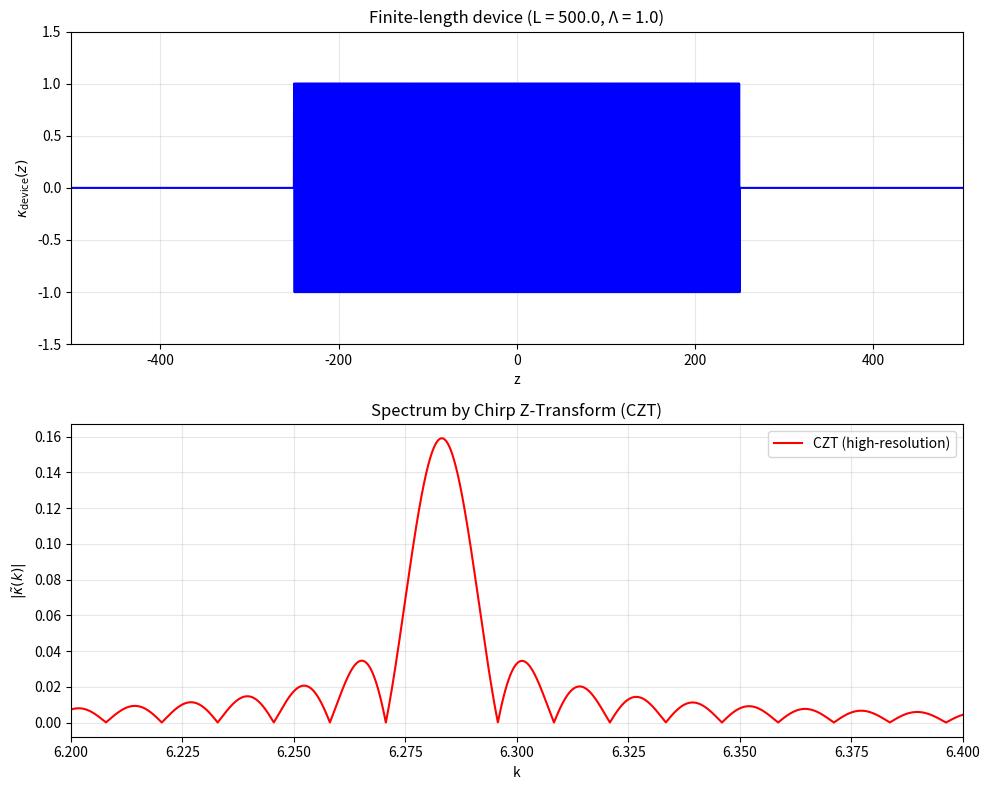

CZTで検出されたピークのk値の範囲:
[6.28 6.29]

理論的なピーク位置: k = ±2π/Λ = ±6.283185
CZTによる高精度なピーク位置: k = 6.283177


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import CZT

# パラメータ
L = 500.0  # デバイス長
Lambda = 1.0  # 分極反転周期
n_points = 8192  # サンプリング点数

# CZT用パラメータ
k_czt_start = 6.2  # 注目する波数範囲の開始点
k_czt_stop = 6.4   # 注目する波数範囲の終了点
m_czt = 8192      # CZTの計算点数（解像度）

# 位置配列
# 信号長はCZTの性能に影響するため、ある程度のゼロパディングを維持
z = np.linspace(-2*L, 2*L, 4*n_points)
dz = z[1] - z[0]

# 有限長デバイス構造
kappa_device = np.sign(np.sin(2 * np.pi * z / Lambda))
kappa_device[np.abs(z) > L/2] = 0

# --- CZT計算 ---
# k = 2π * f を使うと、正規化周波数 fn = f * dz = k * dz / (2π)
fn_start = k_czt_start * dz / (2 * np.pi)
fn_stop = k_czt_stop * dz / (2 * np.pi)

# CZTパラメータ (a: 始点, w: 公比)
a = np.exp(2j * np.pi * fn_start)
delta_fn = (fn_stop - fn_start) / (m_czt - 1)
w = np.exp(-2j * np.pi * delta_fn)  # 指数を負にするのがポイント

# CZT実行
czt_transform = CZT(n=len(kappa_device), m=m_czt, w=w, a=a)
czt_result = czt_transform(kappa_device)

# CZTの結果に対応する波数kの配列
k_czt = np.linspace(k_czt_start, k_czt_stop, m_czt)

# --- プロット ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 1. 実空間のデバイス構造
ax1 = axes[0]
display_z = z[np.abs(z) <= L]
display_kappa = kappa_device[np.abs(z) <= L]
ax1.plot(display_z, display_kappa, 'b-', linewidth=1.5)
ax1.set_xlim(-L, L)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel('z')
ax1.set_ylabel(r'$\kappa_{\mathrm{device}}(z)$')
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Finite-length device (L = {L}, Λ = {Lambda})')

# 2. CZTによるスペクトル解析結果
ax2 = axes[1]
ax2.plot(k_czt, np.abs(czt_result) / len(kappa_device),
         'r-', linewidth=1.5, label='CZT (high-resolution)')
ax2.set_xlim(k_czt_start, k_czt_stop)
ax2.set_xlabel('k')
ax2.set_ylabel(r'$|\tilde{\kappa}(k)|$')
ax2.grid(True, alpha=0.3)
ax2.set_title('Spectrum by Chirp Z-Transform (CZT)')
ax2.legend()

plt.tight_layout()
plt.show()

# --- CZTによるピーク検出 ---
czt_amplitude_threshold = np.max(np.abs(czt_result) / len(kappa_device)) * 0.95
czt_peak_indices = np.where(
    np.abs(czt_result) / len(kappa_device) > czt_amplitude_threshold)[0]
czt_peak_k_values = k_czt[czt_peak_indices]

print("CZTで検出されたピークのk値の範囲:")
print(np.unique(czt_peak_k_values.round(decimals=2)))

# --- より正確なピーク位置の表示 ---
print(f"\n理論的なピーク位置: k = ±2π/Λ = ±{2*np.pi/Lambda:.6f}")

# 正のピークを計算
positive_peak_czt = czt_peak_k_values[czt_peak_k_values > 0]
if positive_peak_czt.size > 0:
    # ピークが複数の点にまたがる場合、その平均値を代表値とする
    peak_center_czt = positive_peak_czt.mean()
    print(f"CZTによる高精度なピーク位置: k = {peak_center_czt:.6f}")
else:
    print("CZT: 正のピークが見つかりませんでした。")

--- Peak Analysis ---
Ideal Structure Peak Amplitude: 0.1591
Modified Structure Peak Amplitude: 0.1069
Conversion Efficiency Drop: 54.92%


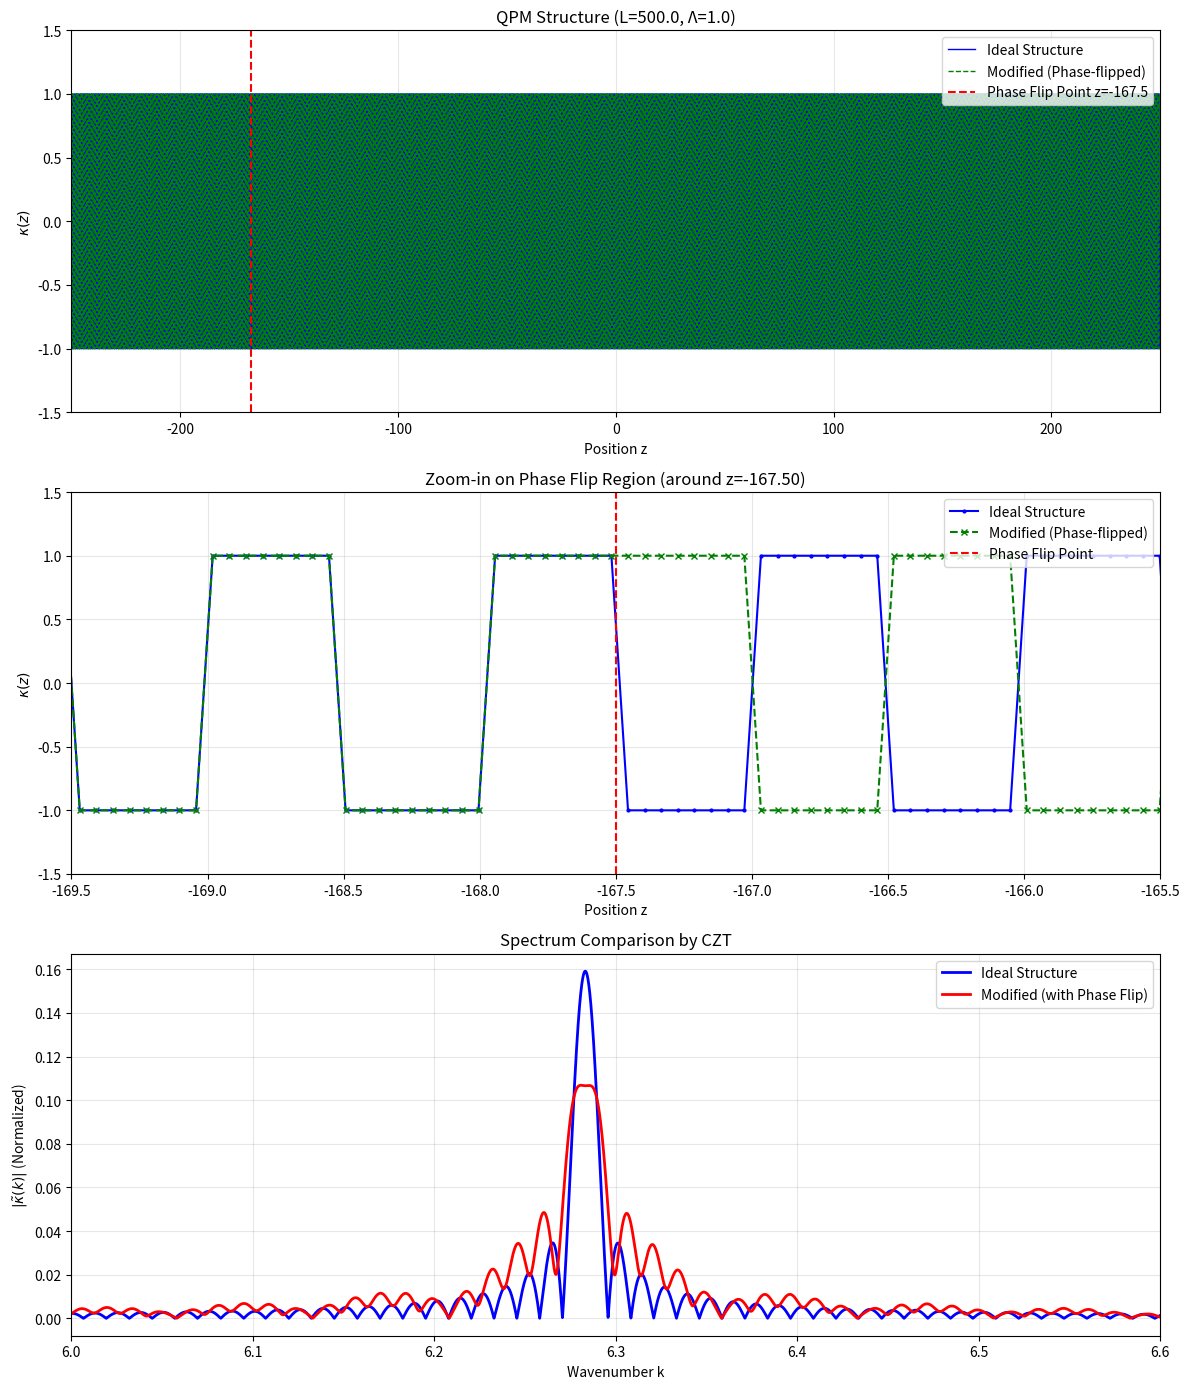

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import CZT

# --- パラメータ設定 ---
L = 500.0          # デバイス長
Lambda = 1.0       # 分極反転周期
n_points = 8192    # サンプリング点数

# CZT用パラメータ
k_czt_start = 6.0
k_czt_stop = 6.6
m_czt = 8192

# --- 空間座標の生成 ---
z = np.linspace(-2*L, 2*L, 4*n_points)
dz = z[1] - z[0]

# --- 1. 理想的なQPM周期構造（窓関数をかける前） ---
kappa_periodic = np.sign(np.sin(2 * np.pi * z / Lambda))

# --- 2. 位相エラーを持つ構造の生成 ---
# まずは理想構造をコピー
kappa_modified_periodic = kappa_periodic.copy()

# 位相エラーの導入位置
z_defect = 0.165 * L - L/2  # z = 82.5

# z > z_defect の領域のインデックスを取得
indices_to_flip = np.where(z > z_defect)

# z > z_defect の領域で符号を全て反転させる（位相がπずれたことに相当）
kappa_modified_periodic[indices_to_flip] *= -1

# --- 3. 有限長デバイスにするための窓関数を適用 ---
window = np.zeros_like(z)
window[np.abs(z) <= L/2] = 1

kappa_ideal = kappa_periodic * window
kappa_modified = kappa_modified_periodic * window

# --- CZT計算の準備 ---
fn_start = k_czt_start * dz / (2 * np.pi)
fn_stop = k_czt_stop * dz / (2 * np.pi)
a = np.exp(2j * np.pi * fn_start)
delta_fn = (fn_stop - fn_start) / (m_czt - 1)
w = np.exp(-2j * np.pi * delta_fn)

czt_transform = CZT(n=len(z), m=m_czt, w=w, a=a)

# --- 各構造に対してCZTを実行 ---
czt_ideal_result = czt_transform(kappa_ideal)
czt_modified_result = czt_transform(kappa_modified)

# CZTの結果に対応する波数kの配列
k_czt = np.linspace(k_czt_start, k_czt_stop, m_czt)
norm_factor = len(z)

# --- 結果のプロット ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14))
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# 1. デバイス構造全体
ax1 = axes[0]
ax1.plot(z, kappa_ideal, 'b-', lw=1, label='Ideal Structure')
ax1.plot(z, kappa_modified, 'g--', lw=1, label='Modified (Phase-flipped)')
ax1.set_xlim(-L/2, L/2)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel('Position z')
ax1.set_ylabel(r'$\kappa(z)$')
ax1.set_title(f'QPM Structure (L={L}, Λ={Lambda})')
# 位相が反転する位置を示す
ax1.axvline(x=z_defect, color='red', linestyle='--',
            label=f'Phase Flip Point z={z_defect}')
ax1.legend(loc='upper right')

# 2. 位相反転部分の拡大図
ax2 = axes[1]
ax2.plot(z, kappa_ideal, 'b-', marker='.', ms=4, label='Ideal Structure')
ax2.plot(z, kappa_modified, 'g--', marker='x',
         ms=4, label='Modified (Phase-flipped)')
ax2.set_xlim(z_defect - 2*Lambda, z_defect + 2*Lambda)  # 反転部周辺を拡大
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel('Position z')
ax2.set_ylabel(r'$\kappa(z)$')
ax2.set_title(f'Zoom-in on Phase Flip Region (around z={z_defect:.2f})')
ax2.axvline(x=z_defect, color='red', linestyle='--', label=f'Phase Flip Point')
ax2.legend(loc='upper right')

# 3. CZTによるスペクトル解析結果の比較
ax3 = axes[2]
ax3.plot(k_czt, np.abs(czt_ideal_result) / norm_factor,
         'b-', lw=2, label='Ideal Structure')
ax3.plot(k_czt, np.abs(czt_modified_result) / norm_factor,
         'r-', lw=2, label='Modified (with Phase Flip)')
ax3.set_xlim(k_czt_start, k_czt_stop)
ax3.set_xlabel('Wavenumber k')
ax3.set_ylabel(r'$|\tilde{\kappa}(k)|$ (Normalized)')
ax3.set_title('Spectrum Comparison by CZT')
ax3.legend()

# --- ピーク値の比較 ---
peak_ideal = np.max(np.abs(czt_ideal_result) / norm_factor)
peak_modified = np.max(np.abs(czt_modified_result) / norm_factor)
efficiency_drop_percent = (
    1 - (peak_modified / peak_ideal)**2) * 100 if peak_ideal > 0 else 0

print("--- Peak Analysis ---")
print(f"Ideal Structure Peak Amplitude: {peak_ideal:.4f}")
print(f"Modified Structure Peak Amplitude: {peak_modified:.4f}")
# 変換効率は振幅の2乗に比例するため、2乗で比較
print(f"Conversion Efficiency Drop: {efficiency_drop_percent:.2f}%")

plt.tight_layout()
plt.show()